In [2]:
#!/usr/bin/python
import sys
import math
import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading convenient environment
# %pylab
%matplotlib inline

plt.rcParams['figure.figsize']=[20.,10.]

In [86]:
# Denomination of data folder

biloc='/home/maxime'
# biloc='/Users/vassaux/picasso_home'
eiloc='/muc_work/local_projects/lammps/polymer/constitutive/6.ensemble_uniaxial_testing/'

iloc=biloc+eiloc

In [151]:
# Extracting mechanical data
floc='PE_straining.dat'

In [29]:
latmp=os.listdir(iloc)
latmp

['test_repl4_tempt300_nsst3750000',
 'test_repl1_tempt300_nsst750000',
 'test_repl3_tempt300_nsst750000',
 'test_repl3_tempt300_nsst3750000',
 'test_repl4_tempt300_nsst750000',
 'test_repl1_tempt300_nsst3750000',
 'test_repl5_tempt300_nsst3750000',
 'test_repl2_tempt300_nsst750000',
 'test_repl2_tempt300_nsst3750000',
 'test_repl5_tempt300_nsst750000']

In [88]:
lattmpt=[]
for thing in latmp:
    if ("nsst750000" in thing):
        lattmpt.append(thing)
        
# lattmpt.append("")
lattmpt.sort()
lattmpt

['test_repl1_tempt300_nsst750000',
 'test_repl2_tempt300_nsst750000',
 'test_repl3_tempt300_nsst750000',
 'test_repl4_tempt300_nsst750000',
 'test_repl5_tempt300_nsst750000']

In [89]:
dtf=pd.DataFrame()
nsavg=750
for thing in lattmpt:
    tloc=iloc+thing+"/"+floc
    print(tloc)
    if(os.path.isfile(tloc)):
#         if(int(thing[9]) < 4):
            print(tloc)
            replica=int(thing[9])
            temp=float(thing[16:19])
            nsstrain=int(thing[24:])
            print(replica, temp, nsstrain)
            erate=15/(nsstrain*2.0)
            ncolumns=['step', 'press', 'pxx', 'pyy', 'pzz', 'pxy', 'pxz', 'pyz', 'pe', 'ke', 'temp', 'lx', 'ly', 'lz', 'vol', 'fail...']
            df=pd.read_csv(tloc, sep=' ', names=ncolumns, skiprows=1)
            df.reset_index(inplace=True)
            df.insert(1, 'erate', erate)
            df.insert(2, 'temperature', temp)
            df.insert(3, 'replica', replica)
            df['step']=df['step']-df['step'][0]
            df['exx']=(df['lx']-df['lx'][0])/df['lx'][0]
            df['eyy']=(df['ly']-df['ly'][0])/df['ly'][0]
            df['ezz']=(df['lz']-df['lz'][0])/df['lz'][0]
            df['ra_pxx']=df['pxx'].rolling(window=int(nsstrain/nsavg)).mean()
            df['ra_pyy']=df['pyy'].rolling(window=int(nsstrain/nsavg)).mean()
            dtf=dtf.append(df)
            #print(df)

/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/6.ensemble_uniaxial_testing/test_repl1_tempt300_nsst750000/PE_straining.dat
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/6.ensemble_uniaxial_testing/test_repl1_tempt300_nsst750000/PE_straining.dat
1 300.0 750000
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/6.ensemble_uniaxial_testing/test_repl2_tempt300_nsst750000/PE_straining.dat
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/6.ensemble_uniaxial_testing/test_repl2_tempt300_nsst750000/PE_straining.dat
2 300.0 750000
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/6.ensemble_uniaxial_testing/test_repl3_tempt300_nsst750000/PE_straining.dat
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/6.ensemble_uniaxial_testing/test_repl3_tempt300_nsst750000/PE_straining.dat
3 300.0 750000
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/6.ensemble_uniaxial_testing/test_repl4_tempt

In [90]:
dtf

,index,erate,temperature,replica,step,press,pxx,pyy,pzz,pxy,...,lx,ly,lz,vol,fail...,exx,eyy,ezz,ra_pxx,ra_pyy
0,0,0.00001,300.0,1,0,-248.021528,-689.714462,-584.464528,530.114406,162.877711,...,69.551570,69.551592,69.551610,336450.514091,3.4,0.000000,0.00000,0.000000e+00,NaN,NaN
1,1,0.00001,300.0,1,1,-308.266128,-711.117830,-635.884160,422.203606,188.723820,...,69.551500,69.552983,69.551665,336457.170932,3.4,-0.000001,0.00002,7.881576e-07,NaN,NaN
2,2,0.00001,300.0,1,2,-336.832675,-684.509711,-615.279215,289.290901,265.401230,...,69.551381,69.554374,69.551749,336463.733159,3.4,-0.000003,0.00004,2.003444e-06,NaN,NaN
3,3,0.00001,300.0,1,3,-309.429977,-601.782125,-516.888418,190.380611,355.685620,...,69.551215,69.555765,69.551854,336470.166806,3.4,-0.000005,0.00006,3.515148e-06,NaN,NaN
4,4,0.00001,300.0,1,4,-209.775061,-451.479897,-338.331614,160.486329,442.763042,...,69.551007,69.557156,69.551973,336476.464530,3.4,-0.000008,0.00008,5.217285e-06,NaN,NaN
5,5,0.00001,300.0,1,5,-67.151122,-261.088016,-121.692058,181.326707,519.123105,...,69.550769,69.558547,69.552102,336482.663146,3.4,-0.000012,0.00010,7.070460e-06,NaN,NaN
6,6,0.00001,300.0,1,6,82.665440,-76.260764,95.929628,228.327457,567.080853,...,69.550512,69.559938,69.552242,336488.831393,3.4,-0.000015,0.00012,9.093317e-06,NaN,NaN
7,7,0.00001,300.0,1,7,214.540279,46.067065,286.592025,310.961747,571.535321,...,69.550250,69.561329,69.552399,336495.047543,3.4,-0.000019,0.00014,1.134058e-05,NaN,NaN
8,8,0.00001,300.0,1,8,311.467534,54.486983,423.108854,456.806766,524.649925,...,69.549990,69.562720,69.552577,336501.381514,3.4,-0.000023,0.00016,1.390254e-05,NaN,NaN
9,9,0.00001,300.0,1,9,356.278901,-45.559568,466.790677,647.605595,423.906647,...,69.549734,69.564111,69.552787,336507.884866,3.4,-0.000026,0.00018,1.692139e-05,NaN,NaN


In [104]:
mdtf=dtf.groupby(['erate','temperature','step']).mean()
mdtf.reset_index(['erate','temperature','step'],inplace=True)
mdtf

,erate,temperature,step,index,replica,press,pxx,pyy,pzz,pxy,...,lx,ly,lz,vol,fail...,exx,eyy,ezz,ra_pxx,ra_pyy
0,0.00001,300.0,0,0.0,3.0,-221.359800,-354.766721,-187.419558,-121.893121,-61.265093,...,69.479088,69.479099,69.479095,335400.213797,3.39137,0.000000e+00,0.00000,0.000000e+00,NaN,NaN
1,0.00001,300.0,1,1.0,3.0,-235.393991,-382.372892,-217.528356,-106.280726,-92.885491,...,69.479051,69.480489,69.479083,335406.686235,3.39137,-5.237865e-07,0.00002,-1.797784e-07,NaN,NaN
2,0.00001,300.0,2,2.0,3.0,-224.410774,-394.256112,-204.113542,-74.862670,-88.939565,...,69.478989,69.481879,69.479063,335412.997053,3.39137,-1.424666e-06,0.00004,-4.649270e-07,NaN,NaN
3,0.00001,300.0,3,3.0,3.0,-199.634709,-378.127364,-168.332230,-52.444534,-56.022823,...,69.478899,69.483268,69.479038,335419.153163,3.39137,-2.712108e-06,0.00006,-8.250836e-07,NaN,NaN
4,0.00001,300.0,4,4.0,3.0,-154.231757,-325.506958,-103.521379,-33.666934,-0.018952,...,69.478784,69.484658,69.479009,335425.166012,3.39137,-4.373110e-06,0.00008,-1.238863e-06,NaN,NaN
5,0.00001,300.0,5,5.0,3.0,-99.905100,-253.389329,-27.914751,-18.411219,71.189286,...,69.478646,69.486047,69.478978,335431.057539,3.39137,-6.359484e-06,0.00010,-1.688893e-06,NaN,NaN
6,0.00001,300.0,6,6.0,3.0,-51.266611,-183.393697,40.569970,-10.976105,133.884675,...,69.478490,69.487437,69.478945,335436.856402,3.39137,-8.600736e-06,0.00012,-2.160198e-06,NaN,NaN
7,0.00001,300.0,7,7.0,3.0,-18.582326,-133.513499,86.792936,-9.026414,159.152624,...,69.478322,69.488827,69.478912,335442.589762,3.39137,-1.102555e-05,0.00014,-2.643146e-06,NaN,NaN
8,0.00001,300.0,8,8.0,3.0,-3.323940,-113.109177,104.029375,-0.892020,136.899291,...,69.478144,69.490216,69.478878,335448.276423,3.39137,-1.358199e-05,0.00016,-3.133651e-06,NaN,NaN
9,0.00001,300.0,9,9.0,3.0,-0.910536,-118.707515,100.542165,15.433743,78.029420,...,69.477959,69.491606,69.478844,335453.925972,3.39137,-1.624846e-05,0.00018,-3.624729e-06,NaN,NaN


1e-05 300.0


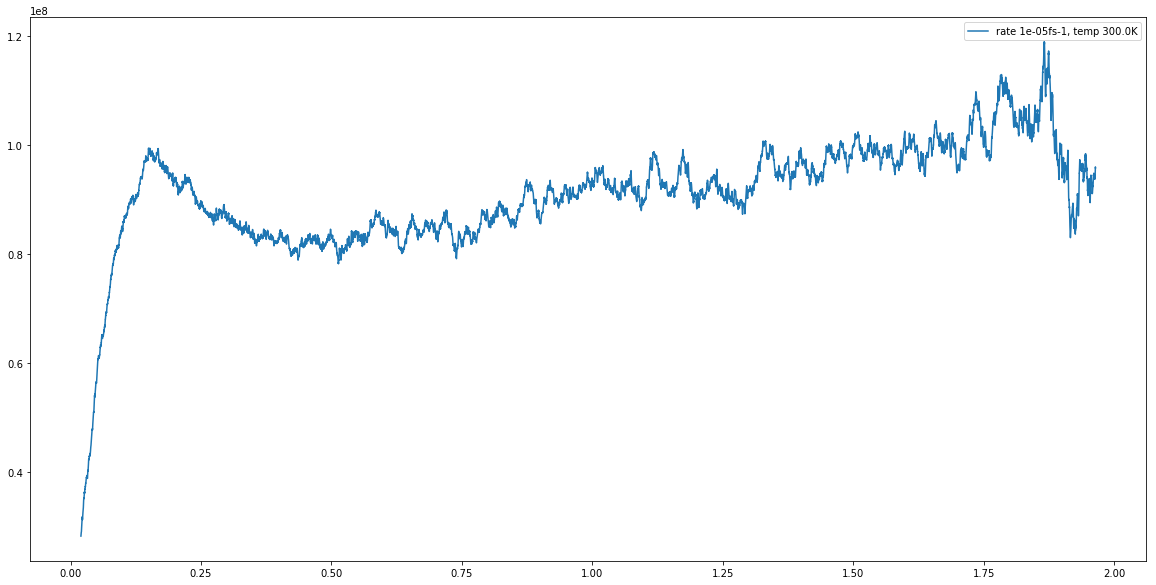

In [98]:
for erate in mdtf['erate'].unique():
    for temp in mdtf['temperature'].unique():
        print(erate,temp)
        emdtf=mdtf[mdtf['erate']==erate]
        temdtf=emdtf[emdtf['temperature']==temp]
        slab='rate '+str(erate)+'fs-1,'+' temp '+str(temp)+'K'
        plt.plot(temdtf['eyy'][0:],-101325*temdtf['ra_pyy'][0:], label=slab)
        
# plt.plot(expdf['eyy'],expdf['pyy'], label='exp:HDPE_KT10000_MFI8_d0.964, temp:room, rate:0.008s-1')
plt.legend()
plt.show()

In [92]:
# Extraction of radius data
gloc='gr.dat'

In [147]:
tmctgrdtf=pd.DataFrame()
for thing in lattmpt:
    file=iloc+thing+"/"+gloc
    file = open(file, "r")
    replica=int(thing[9])
    temp=float(thing[16:19])
    nsstrain=int(thing[24:])
    print(replica, temp, nsstrain)
    tgrdtf=pd.DataFrame()
    count=0
    for line in file:
        if(line.startswith('#')==False):
            if(len(line.split(' '))==2):
                if(count==0):
                    time=int(line.split(' ')[0])
                    nmol=int(line.split(' ')[1])
                    count=nmol
                    grdtf=pd.DataFrame()
                    lgr=[]
                    ltt=[]
                    lmol=[]
    #                 print(time, nmol)
                else:
                    count=count-1
                    imol=int(line.split(' ')[0])
                    gr=float(line.split(' ')[1])
                    lgr.append(gr)
                    lmol.append(imol)
                    ltt.append(time)
                    if(count==0):
                        grdtf.insert(0, 'time', ltt)
                        grdtf.insert(1, 'molecule', lmol)
                        grdtf.insert(2, 'radius', lgr)
                        tgrdtf=tgrdtf.append(grdtf)

    ctgrdtf=tgrdtf[tgrdtf['molecule']>=150].copy()
    ctgrdtf['molecule']=ctgrdtf['molecule']-150
    ctgrdtf['step']=ctgrdtf['time']-ctgrdtf['time'].iloc[0]

    mctgrdtf=ctgrdtf.groupby('time').mean()
    mctgrdtf.reset_index(inplace=True)
    mctgrdtf.insert(1, 'erate', erate)
    mctgrdtf.insert(2, 'temperature', temp)
    mctgrdtf.insert(3, 'replica', replica)
    
    tmctgrdtf=tmctgrdtf.append(mctgrdtf)
            

1 300.0 750000
2 300.0 750000
3 300.0 750000
4 300.0 750000
5 300.0 750000


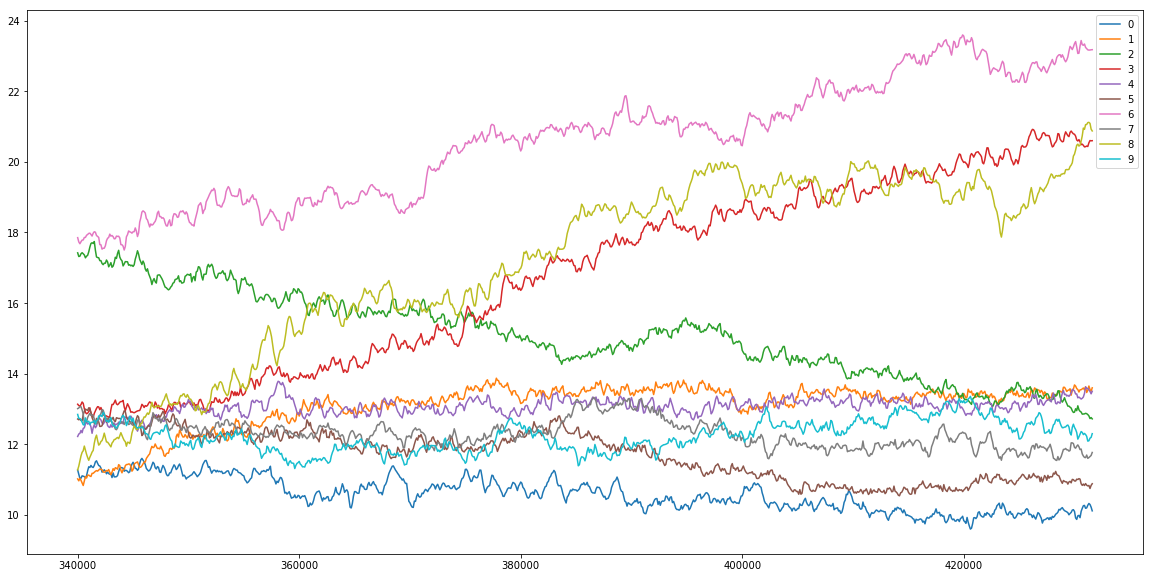

In [150]:
for mol in ctgrdtf['molecule'].unique():
    if(mol<10):
#         print (mol)
        plt.plot(ctgrdtf[ctgrdtf['molecule']==mol]['time'], 
                 ctgrdtf[ctgrdtf['molecule']==mol]['radius'], label=mol)
        
plt.legend()
plt.show()

In [96]:
tmctgrdtf

,time,erate,temperature,replica,molecule,radius,step
0,340000,0.00001,300.0,1,73.5,13.446557,0.0
1,340100,0.00001,300.0,1,73.5,13.456311,100.0
2,340200,0.00001,300.0,1,73.5,13.453529,200.0
3,340300,0.00001,300.0,1,73.5,13.460479,300.0
4,340400,0.00001,300.0,1,73.5,13.456870,400.0
5,340500,0.00001,300.0,1,73.5,13.447994,500.0
6,340600,0.00001,300.0,1,73.5,13.443084,600.0
7,340700,0.00001,300.0,1,73.5,13.445187,700.0
8,340800,0.00001,300.0,1,73.5,13.441376,800.0
9,340900,0.00001,300.0,1,73.5,13.430514,900.0


In [140]:
mtmctgrdtf=tmctgrdtf.groupby(['erate','temperature','step']).mean()
mtmctgrdtf.reset_index(['erate','temperature','step'],inplace=True)

tmp=mdtf.iloc[::100]
mtmctgrdtf['eyy']=0.0
mtmctgrdtf['eyy'][:]=tmp['eyy'][:]
mtmctgrdtf['ra_pyy']=0.0
mtmctgrdtf['ra_pyy'][:]=tmp['ra_pyy'][:]
mtmctgrdtf

,erate,temperature,step,time,replica,molecule,radius,eyy,ra_pyy
0,0.00001,300.0,0.0,339140.0,3.0,73.5,13.711915,0.000,NaN
1,0.00001,300.0,100.0,339240.0,3.0,73.5,13.712396,0.002,NaN
2,0.00001,300.0,200.0,339340.0,3.0,73.5,13.704669,0.004,NaN
3,0.00001,300.0,300.0,339440.0,3.0,73.5,13.710084,0.006,NaN
4,0.00001,300.0,400.0,339540.0,3.0,73.5,13.718070,0.008,NaN
5,0.00001,300.0,500.0,339640.0,3.0,73.5,13.718183,0.010,NaN
6,0.00001,300.0,600.0,339740.0,3.0,73.5,13.720843,0.012,NaN
7,0.00001,300.0,700.0,339840.0,3.0,73.5,13.722536,0.014,NaN
8,0.00001,300.0,800.0,339940.0,3.0,73.5,13.719708,0.016,NaN
9,0.00001,300.0,900.0,340040.0,3.0,73.5,13.714636,0.018,NaN


1e-05 300.0


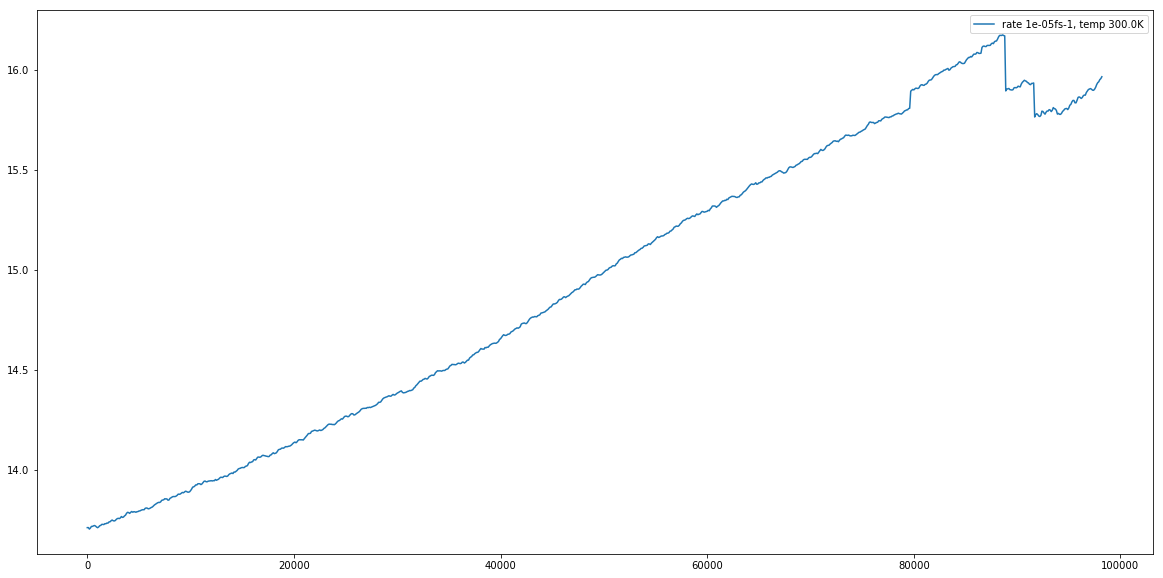

In [146]:
for erate in mtmctgrdtf['erate'].unique():
    for temp in mtmctgrdtf['temperature'].unique():
        print(erate,temp)
        emtmctgrdtf=mtmctgrdtf[mtmctgrdtf['erate']==erate]
        temtmctgrdtf=emtmctgrdtf[emtmctgrdtf['temperature']==temp]
        slab='rate '+str(erate)+'fs-1,'+' temp '+str(temp)+'K'
        plt.plot(temtmctgrdtf['step'],temtmctgrdtf['radius'], label=slab)
#         plt.plot(temtmctgrdtf['radius'],-101325*temtmctgrdtf['ra_pyy'], label=slab)
        
plt.legend()
plt.show()